In [ ]:
from google.colab import files

uploaded = files.upload()

# Verify the upload
for fn in uploaded.keys():
    print('Uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
Uploaded file "kaggle.json" with length 65 bytes


In [ ]:
!pip install -q kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d julian3833/jigsaw-unintended-bias-in-toxicity-classification


Dataset URL: https://www.kaggle.com/datasets/julian3833/jigsaw-unintended-bias-in-toxicity-classification
License(s): CC0-1.0
 99% 713M/723M [00:11<00:00, 64.5MB/s]
100% 723M/723M [00:11<00:00, 65.1MB/s]


In [ ]:
import zipfile

# Specify the correct filename here
zip_file_path = 'jigsaw-unintended-bias-in-toxicity-classification.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('data/')

In [ ]:
import pandas as pd

train_df = pd.read_csv('data/train.csv')
# Process the data as needed

In [ ]:
test_df = pd.read_csv('data/test.csv')
# Process the data as needed

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

In [ ]:
test_df.shape

(97320, 2)

In [ ]:
train_df.isnull().sum()

id                                           0
target                                       0
comment_text                                 3
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399744
male         

In [ ]:
print("Train and test shape: {} {}".format(train_df.shape, test_df.shape))

Train and test shape: (1804874, 45) (97320, 2)


In [ ]:
import tensorflow as tf
print(tf.test.gpu_device_name())

In [ ]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2.15.0
2.15.0


In [ ]:
pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 5.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer
import math
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, mean_squared_error
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
import gensim
import string
import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

from keras.layers import Dropout
import warnings
from keras import backend as K

<ipython-input-16-81e5bdcdab85>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['target'], kde=True, hist=False, bins=240, label='target')


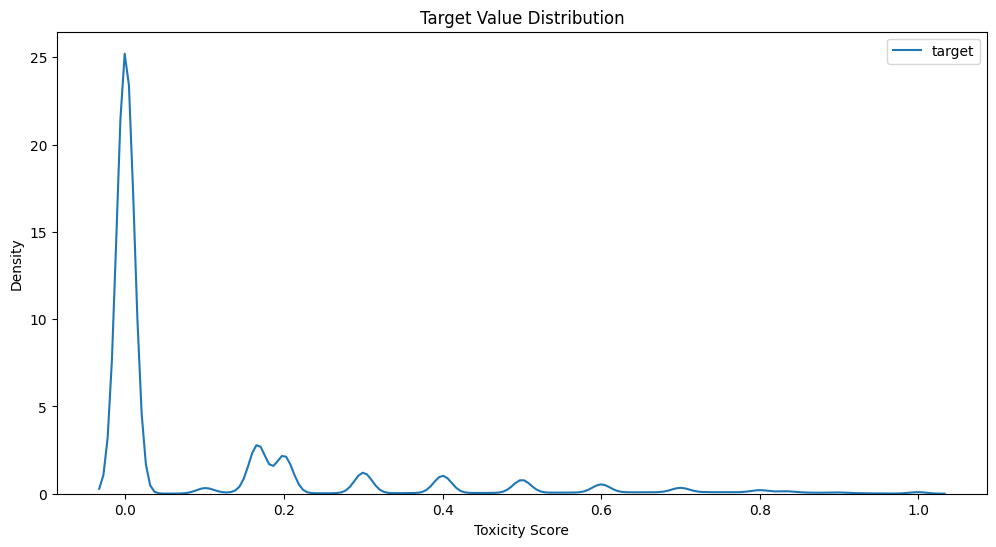

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.title("Target Value Distribution")
sns.distplot(train_df['target'], kde=True, hist=False, bins=240, label='target')
plt.xlabel('Toxicity Score')
plt.ylabel('Density')
plt.legend()
plt.show()

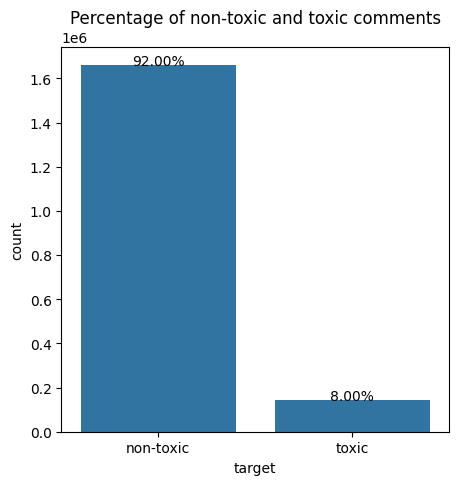

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# If toxicity rating < 0.5 then the comment is non-toxic else it is toxic.
temp = train_df['target'].apply(lambda x: "non-toxic" if x < 0.5 else "toxic")

# Plot the number and percentage of toxic and non-toxic comments.
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
total = float(len(temp))

# Plot the count plot with corrected orientation
sns.countplot(x=temp, ax=ax)
ax.set_title('Percentage of non-toxic and toxic comments')

# Get the height and calculate percentage then display it the plot itself.
for p in ax.patches:
    # Get height.
    height = p.get_height()
    # Plot at appropriate position.
    ax.text(p.get_x() + p.get_width() / 2.0, height + 3, '{:1.2f}%'.format(100 * height / total), ha='center')

plt.show()


<ipython-input-18-75c3b814dac7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],kde=True,hist=False, bins=240, label=feature)
<ipython-input-18-75c3b814dac7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],kde=True,hist=False, bins=240, label=featu

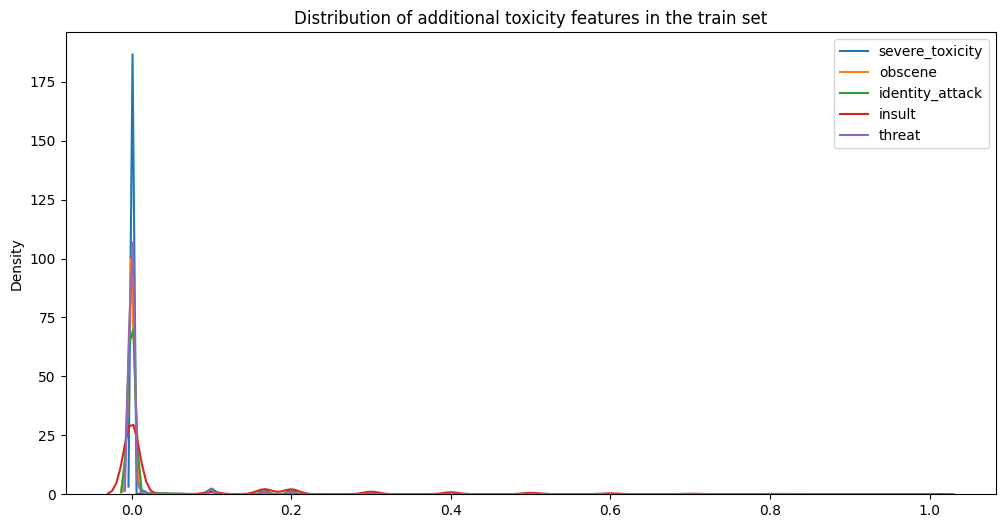

In [ ]:
def plot_features_distribution(features, title, data):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        sns.distplot(data[feature],kde=True,hist=False, bins=240, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()
features = ['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']
plot_features_distribution(features, "Distribution of additional toxicity features in the train set", train_df)

<ipython-input-18-75c3b814dac7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],kde=True,hist=False, bins=240, label=feature)
<ipython-input-18-75c3b814dac7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],kde=True,hist=False, bins=240, label=featu

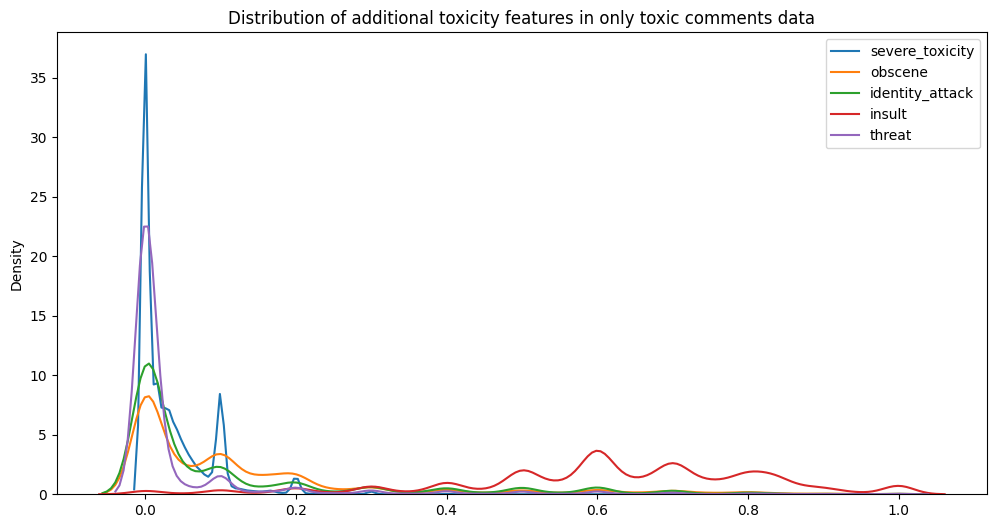

In [ ]:
# Looking at the distribution of additional toxicity features on the comments that are actually considered toxic:
temp = train_df[train_df['target'] > 0.5]
plot_features_distribution(features, "Distribution of additional toxicity features in only toxic comments data", temp)

In [ ]:
def get_comment_nature(row):
    # Extract type of toxic comment
    row = [row['severe_toxicity'], row['obscene'], row['identity_attack'], row['insult'], row['threat']]

    maxarg = np.argmax(np.array(row)) # Get the max value index.

    if maxarg == 0: return 'severe_toxicity'
    elif maxarg == 1: return 'obscene'
    elif maxarg == 2: return 'identity_attack'
    elif maxarg == 3: return 'insult'
    else: return 'threat'

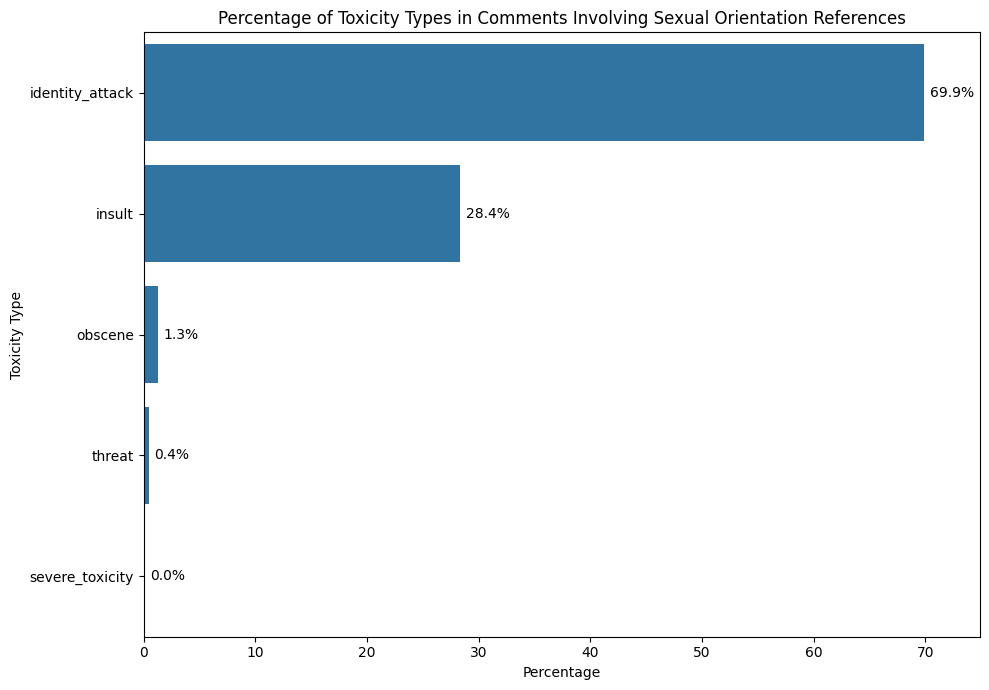

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cond = (train_df['bisexual'] > 0.5) | \
       (train_df['heterosexual'] > 0.5) | \
       (train_df['homosexual_gay_or_lesbian'] > 0.5) | \
       (train_df['other_sexual_orientation'] > 0.5)

# Filter the DataFrame based on the condition
temp = train_df[cond]
temp = temp[temp['target'] > 0.5]  # Extract only toxic comments

# Get the nature of each toxic comment
toxicity_types = temp.apply(get_comment_nature, axis=1)

# Calculate percentages
toxicity_counts = toxicity_types.value_counts()
toxicity_percentages = toxicity_counts / len(toxicity_types) * 100

# Plotting
plt.figure(figsize=(10, 7))
ax = sns.barplot(y=toxicity_percentages.index, x=toxicity_percentages.values, orient='h')

# Add percentage labels to the end of each bar
for i, v in enumerate(toxicity_percentages.values):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center')

plt.title('Percentage of Toxicity Types in Comments Involving Sexual Orientation References')
plt.xlabel('Percentage')
plt.ylabel('Toxicity Type')

# Adjust x-axis to make room for percentage labels
plt.xlim(0, max(toxicity_percentages) + 5)

plt.tight_layout()
plt.show()

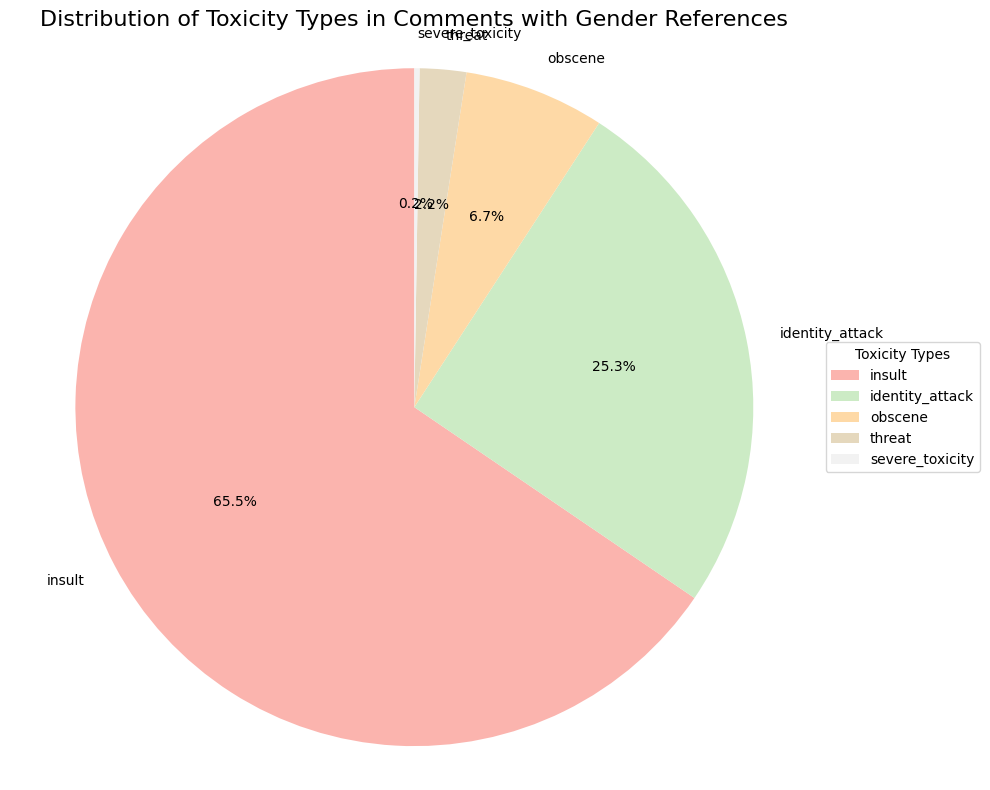

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data
gender_cond = (train_df['male'] > 0.5) | (train_df['female'] > 0.5) | \
              (train_df['transgender'] > 0.5) | (train_df['other_gender'] > 0.5)
gender_toxic_comments = train_df[gender_cond & (train_df['target'] > 0.5)]

# Get toxicity types
toxicity_types = gender_toxic_comments.apply(get_comment_nature, axis=1)

# Calculate percentages
type_counts = toxicity_types.value_counts()
type_percentages = type_counts / len(toxicity_types) * 100

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(type_percentages, labels=type_percentages.index, autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Pastel1(np.linspace(0, 1, len(type_percentages))))

plt.title('Distribution of Toxicity Types in Comments with Gender References', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend
plt.legend(title="Toxicity Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

<ipython-input-23-96d864f1c702>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vote_counts.index, y=vote_counts.values, ax=ax, palette='viridis')
<ipython-input-23-96d864f1c702>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vote_counts.index, y=vote_counts.values, ax=ax, palette='viridis')


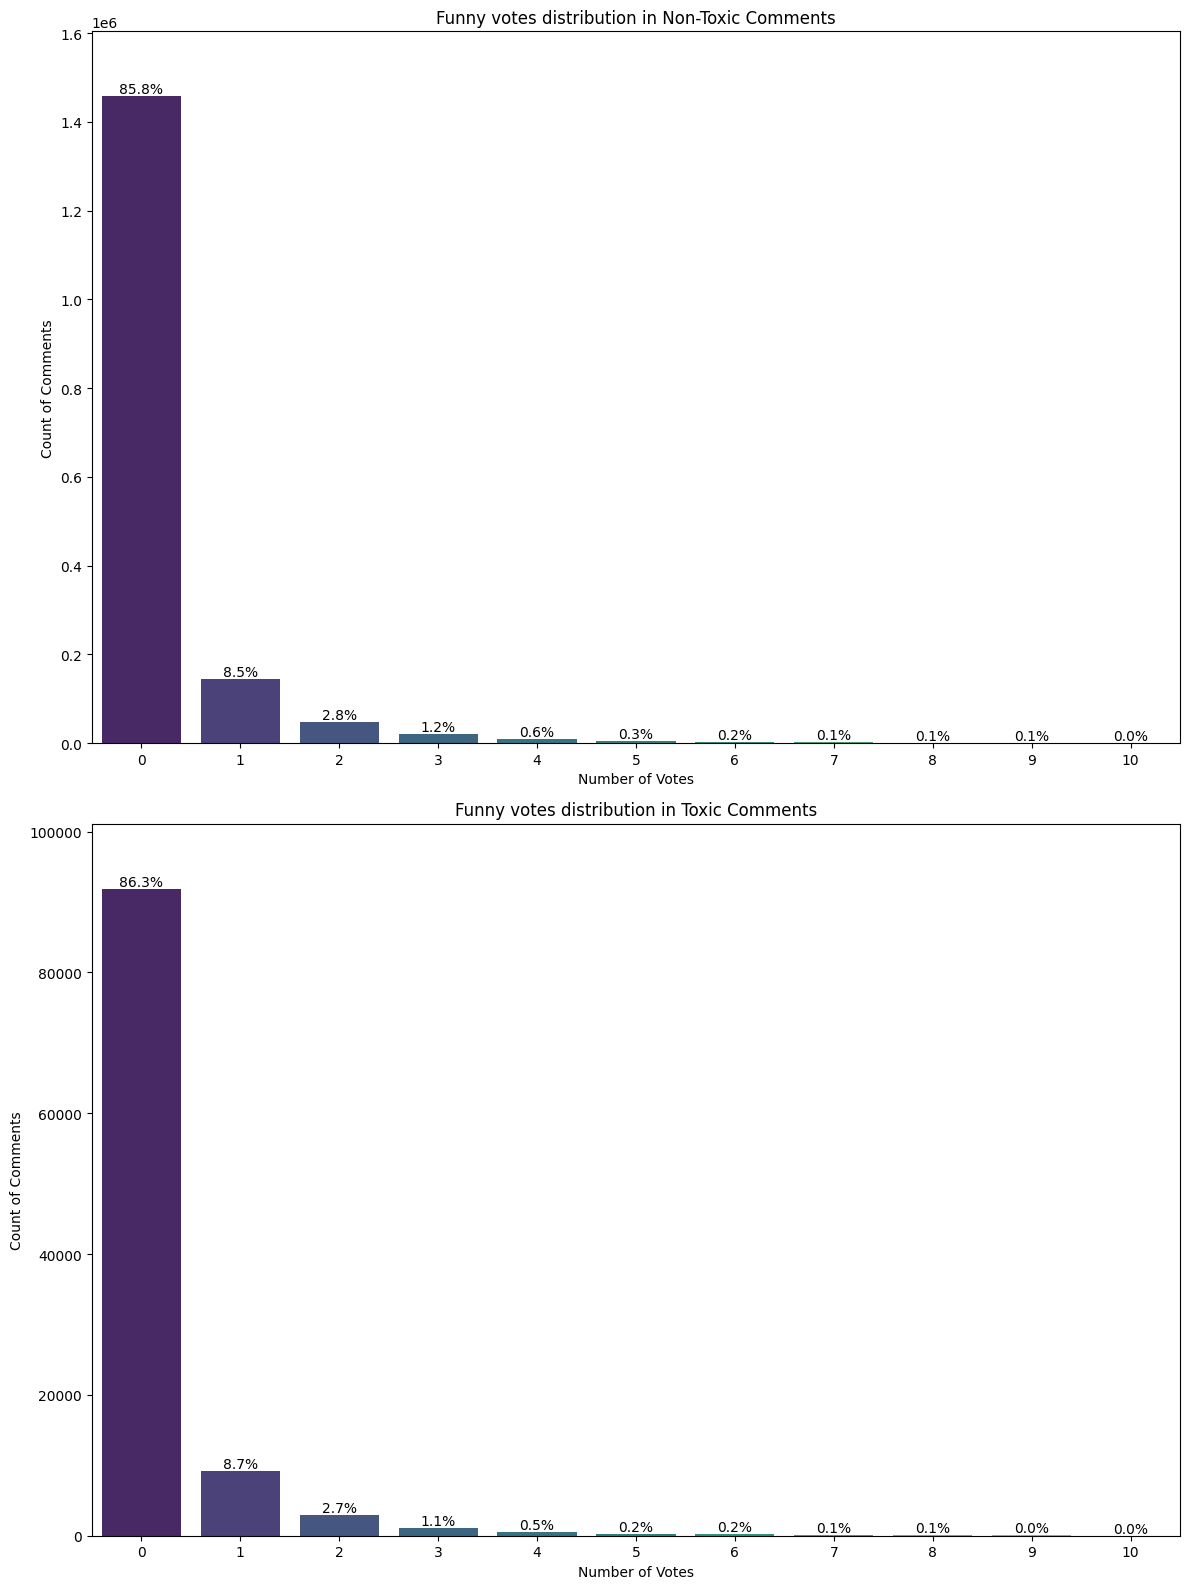

<ipython-input-23-96d864f1c702>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vote_counts.index, y=vote_counts.values, ax=ax, palette='viridis')
<ipython-input-23-96d864f1c702>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vote_counts.index, y=vote_counts.values, ax=ax, palette='viridis')


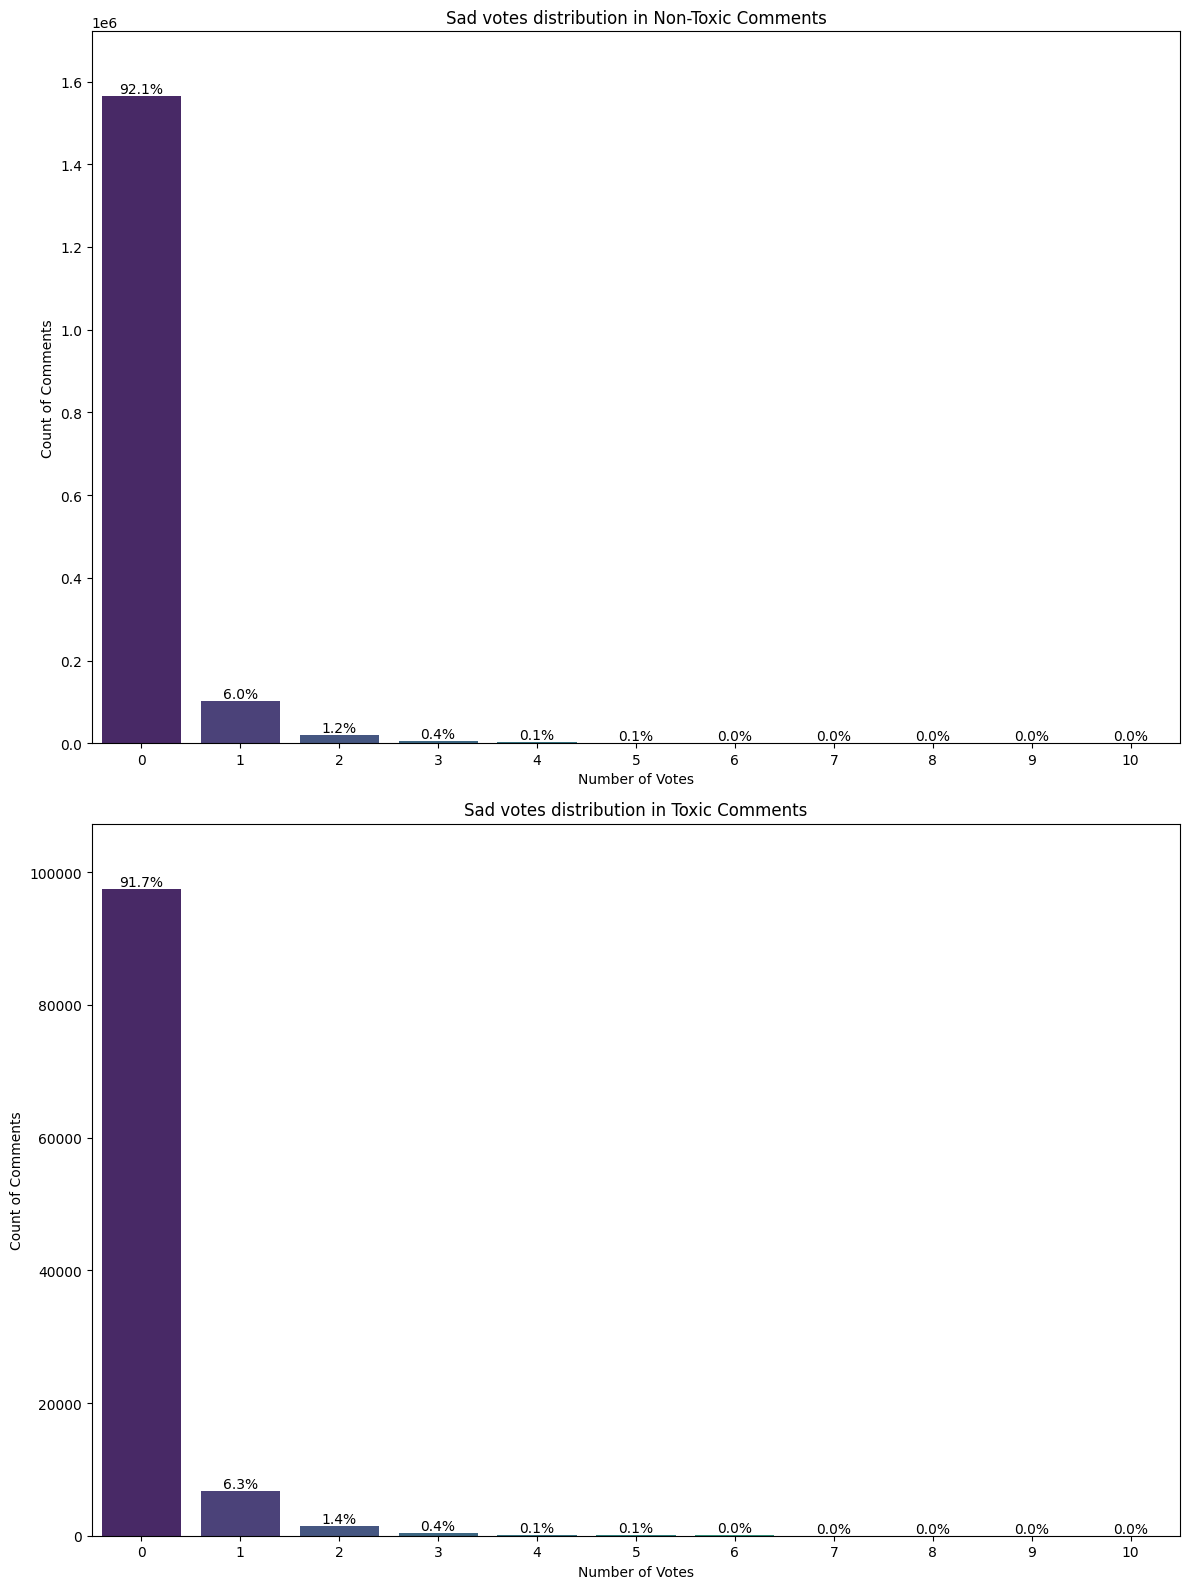

<ipython-input-23-96d864f1c702>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vote_counts.index, y=vote_counts.values, ax=ax, palette='viridis')
<ipython-input-23-96d864f1c702>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vote_counts.index, y=vote_counts.values, ax=ax, palette='viridis')


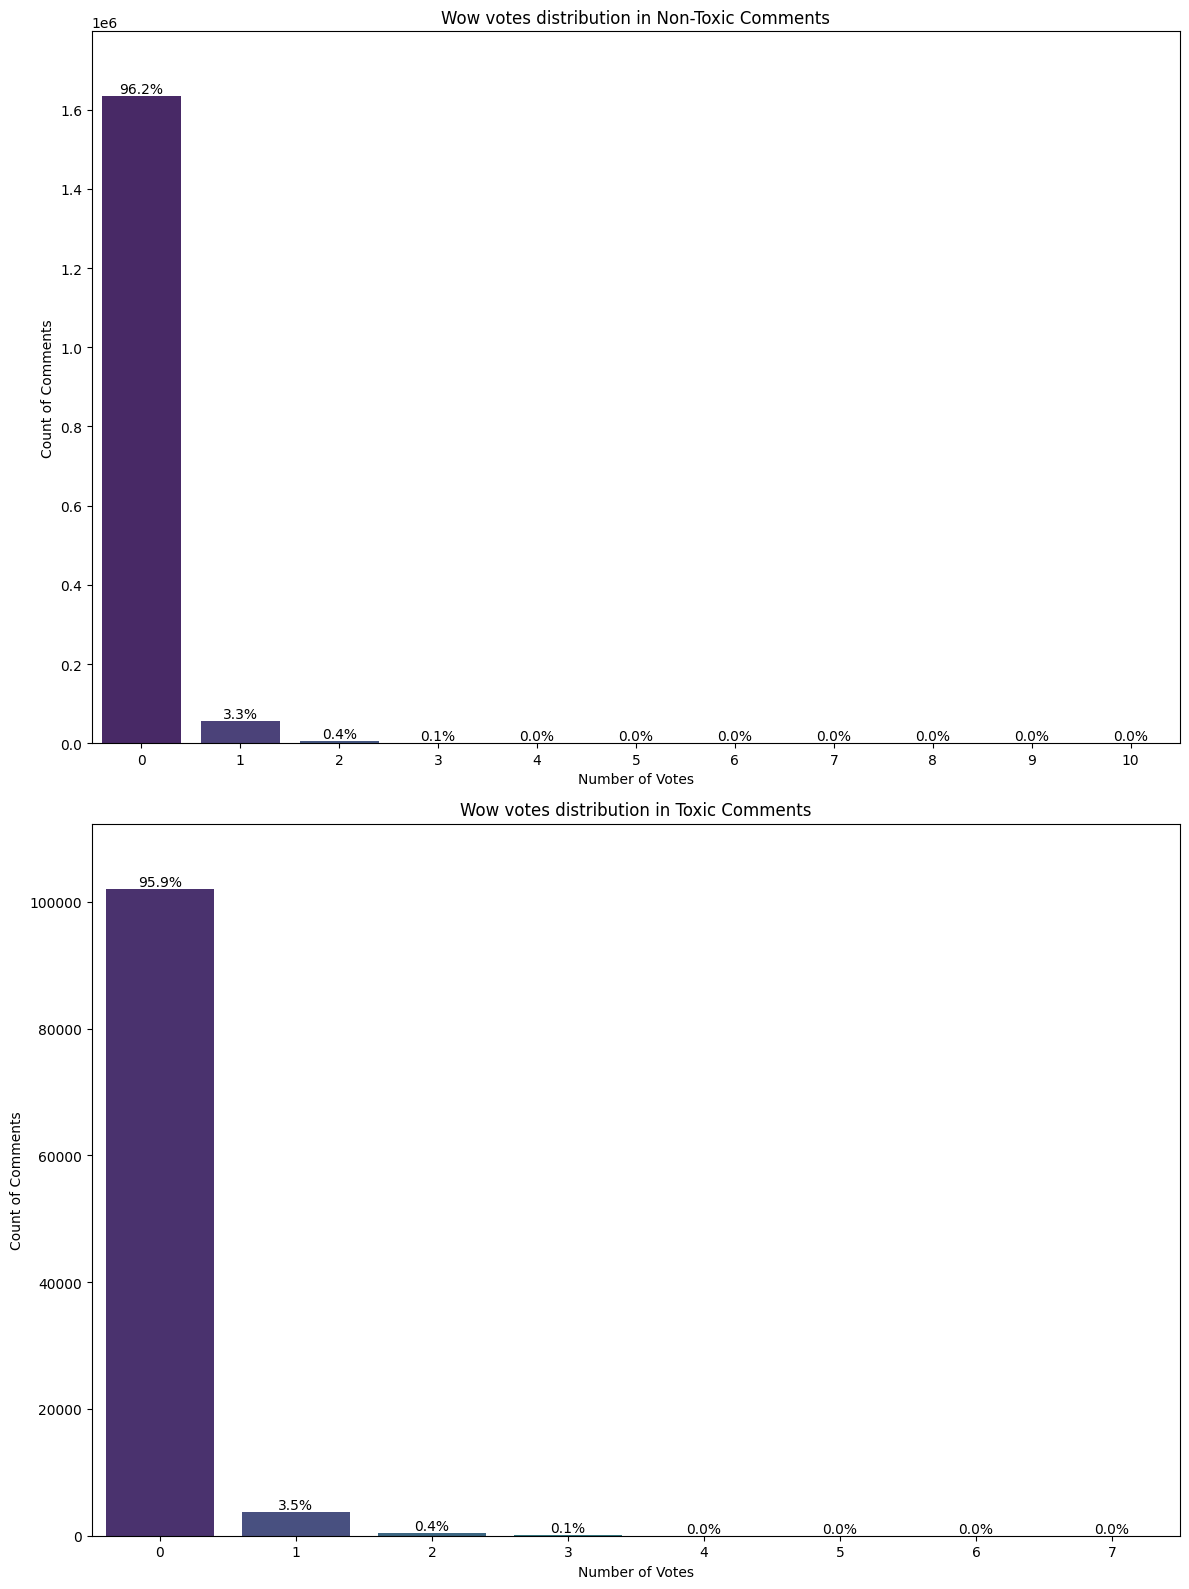

<ipython-input-23-96d864f1c702>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vote_counts.index, y=vote_counts.values, ax=ax, palette='viridis')
<ipython-input-23-96d864f1c702>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vote_counts.index, y=vote_counts.values, ax=ax, palette='viridis')


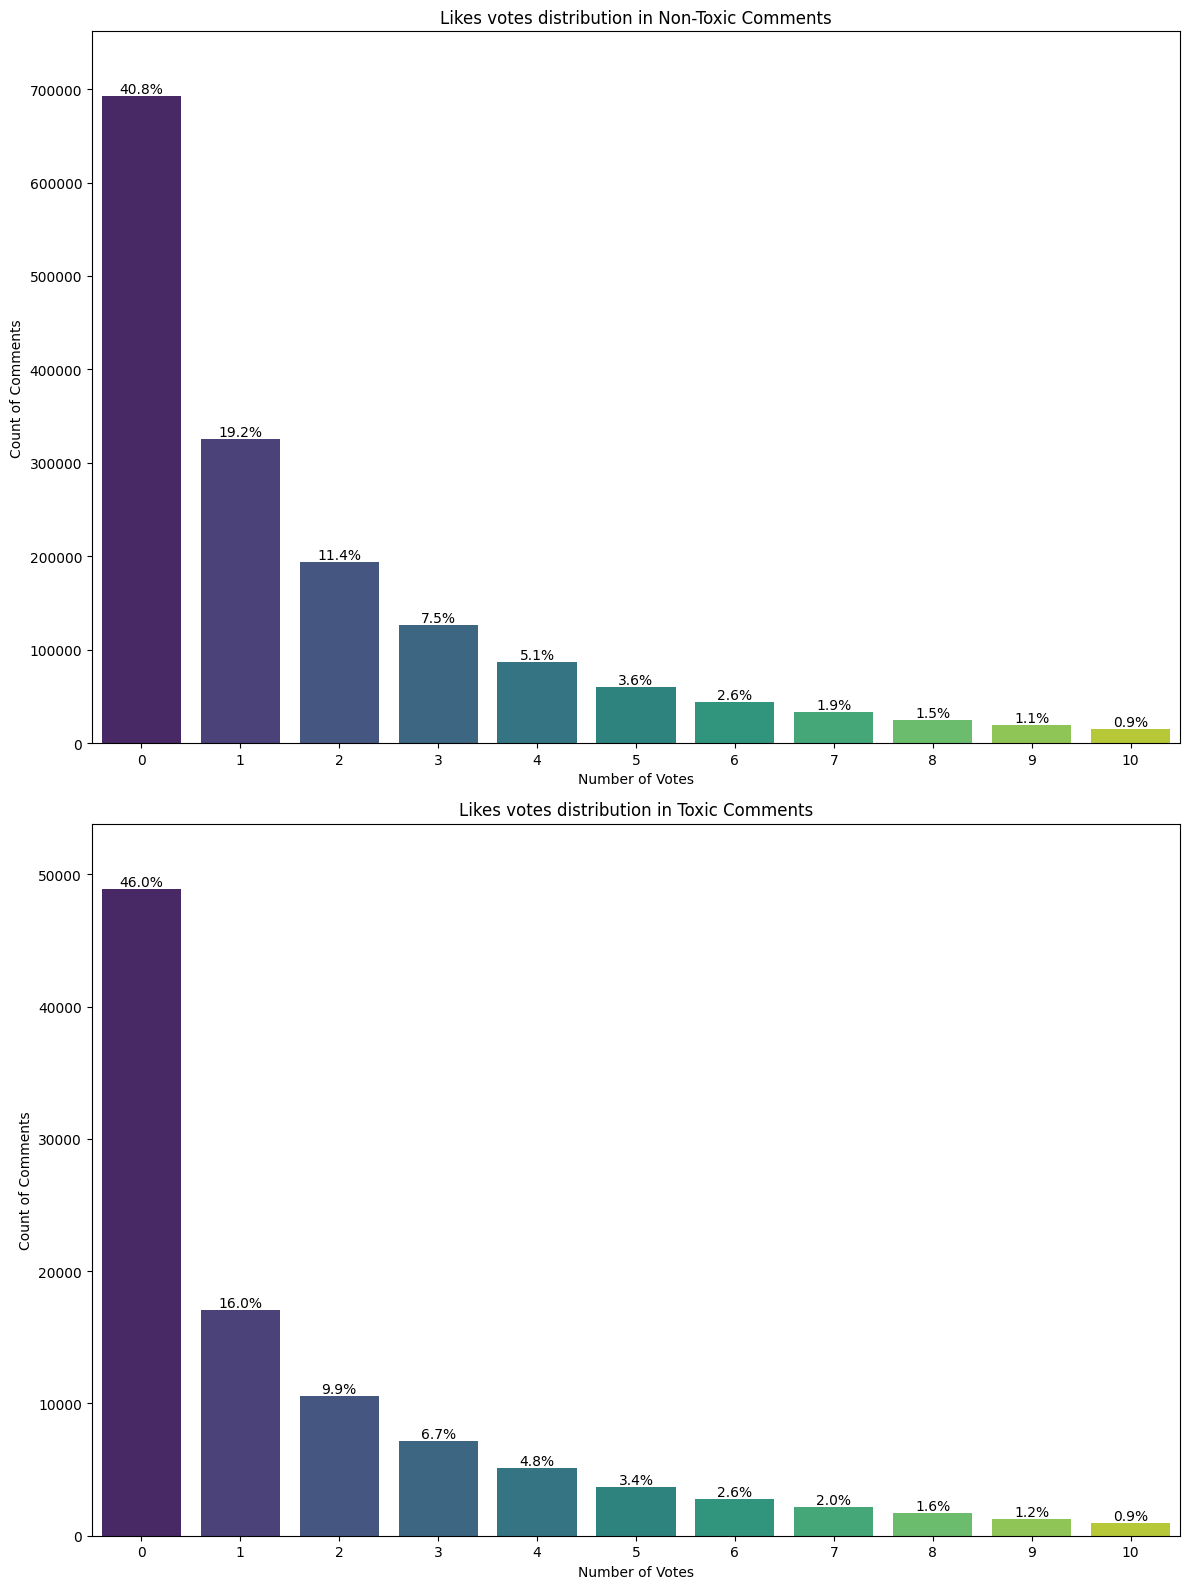

<ipython-input-23-96d864f1c702>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vote_counts.index, y=vote_counts.values, ax=ax, palette='viridis')
<ipython-input-23-96d864f1c702>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vote_counts.index, y=vote_counts.values, ax=ax, palette='viridis')


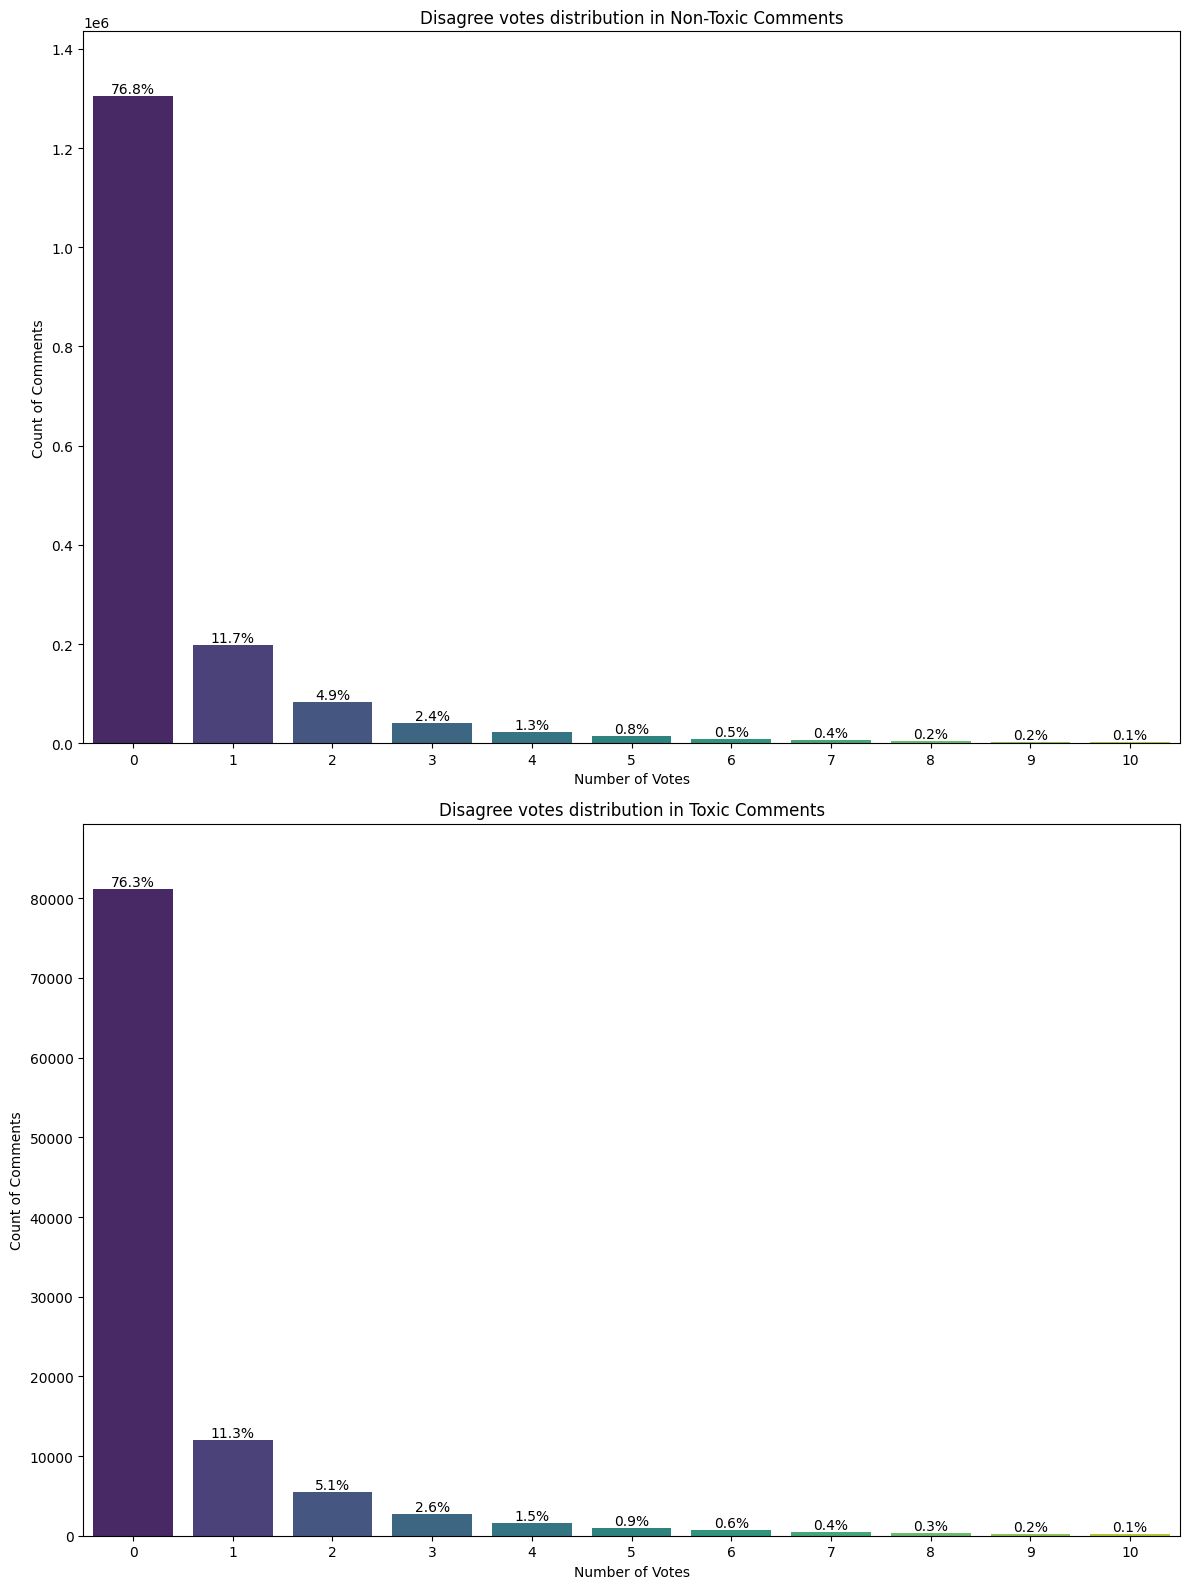

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_vote_distribution(feature, train_df, max_votes=10):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

    for ax, data, title in zip([ax1, ax2],
                               [train_df[train_df['target'] <= 0.5], train_df[train_df['target'] > 0.5]],
                               ['Non-Toxic Comments', 'Toxic Comments']):

        # Count the number of comments for each vote count
        vote_counts = data[feature].value_counts().sort_index()

        # Limit to max_votes
        vote_counts = vote_counts[vote_counts.index <= max_votes]

        # Calculate percentages
        total = len(data)
        percentages = vote_counts / total * 100

        # Create the bar plot
        sns.barplot(x=vote_counts.index, y=vote_counts.values, ax=ax, palette='viridis')

        # Customize the plot
        ax.set_title(f"{feature.capitalize()} votes distribution in {title}")
        ax.set_xlabel('Number of Votes')
        ax.set_ylabel('Count of Comments')

        # Add percentage labels on top of each bar
        for i, (count, percentage) in enumerate(zip(vote_counts, percentages)):
            ax.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

        # Set y-axis to start at 0
        ax.set_ylim(0, vote_counts.max() * 1.1)

    plt.tight_layout()
    plt.show()

# Apply the function to the required features
for feature in ['funny', 'sad', 'wow', 'likes', 'disagree']:
    plot_vote_distribution(feature, train_df)

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Ensure stopwords are downloaded
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Define the stopwords
stpwrds = set(STOPWORDS)

# Define a function to display a word cloud
def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stpwrds,
        max_words=50,
        max_font_size=40,
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

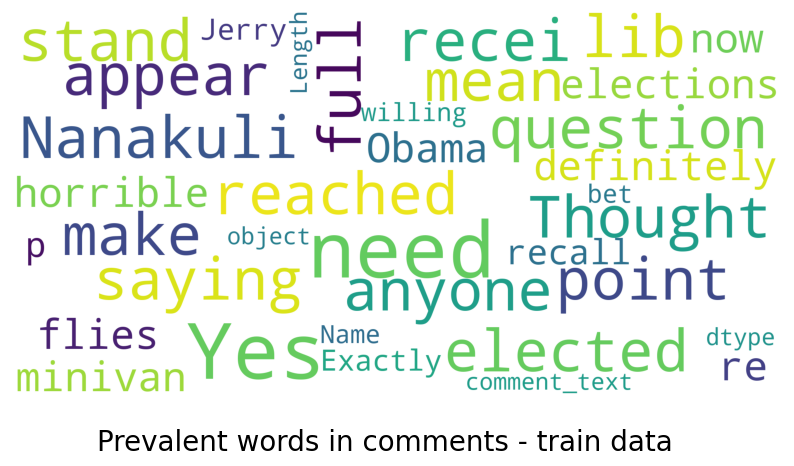

In [ ]:
show_wordcloud(train_df['comment_text'].sample(20000), title='Prevalent words in comments - train data')

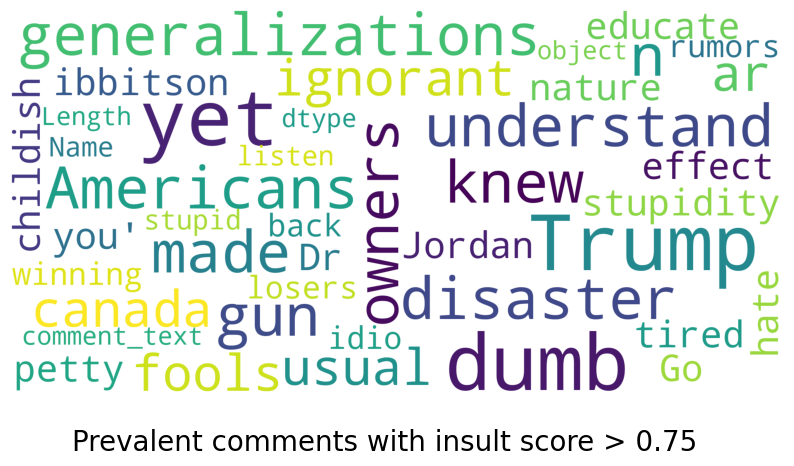

In [ ]:
show_wordcloud(train_df.loc[train_df['insult'] > 0.75]['comment_text'].sample(20000),
               title='Prevalent comments with insult score > 0.75')

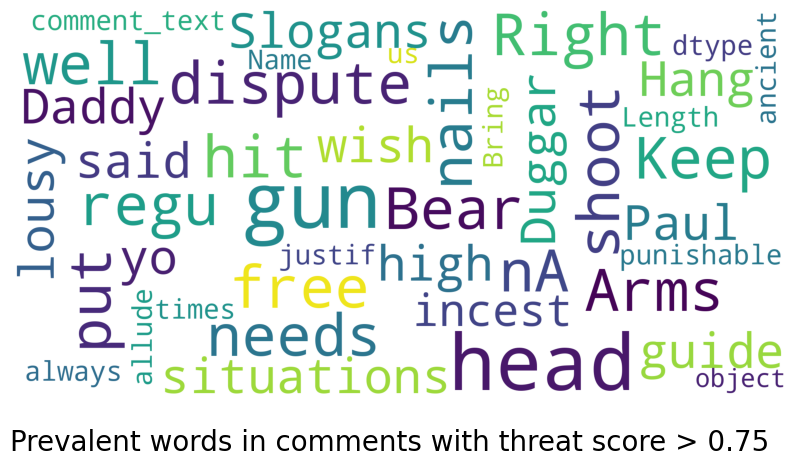

In [ ]:
show_wordcloud(train_df.loc[train_df['threat'] > 0.75]['comment_text'],
               title='Prevalent words in comments with threat score > 0.75')

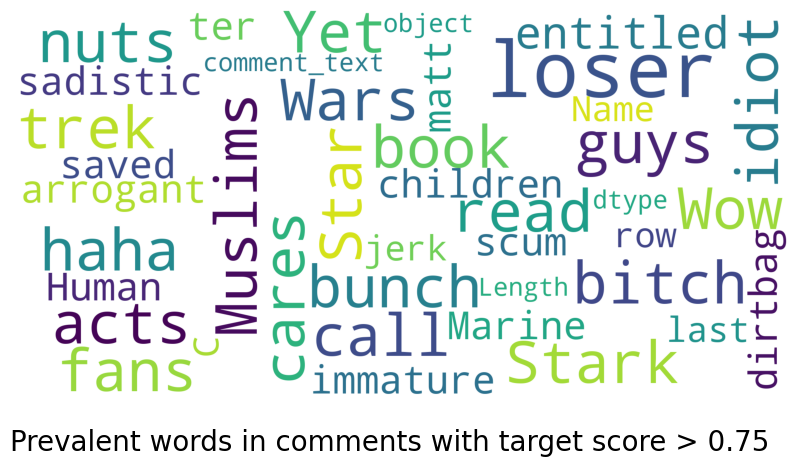

In [ ]:
show_wordcloud(train_df.loc[train_df['target'] > 0.75]['comment_text'],
               title = 'Prevalent words in comments with target score > 0.75')

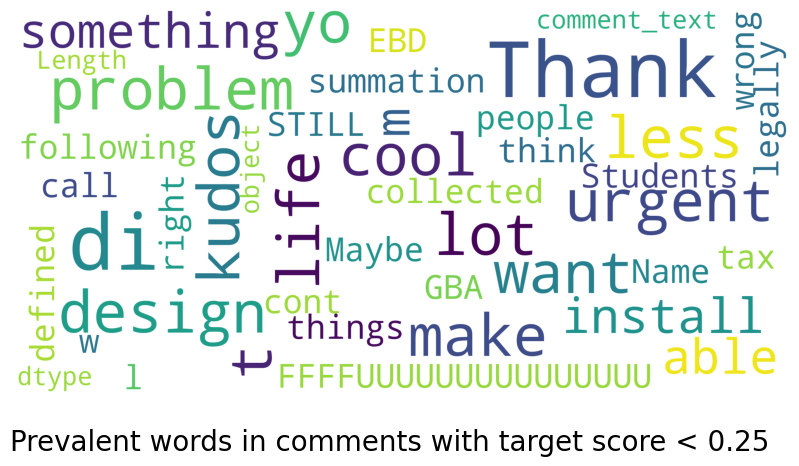

In [ ]:
show_wordcloud(train_df.loc[train_df['target'] < 0.25]['comment_text'],
               title = 'Prevalent words in comments with target score < 0.25')

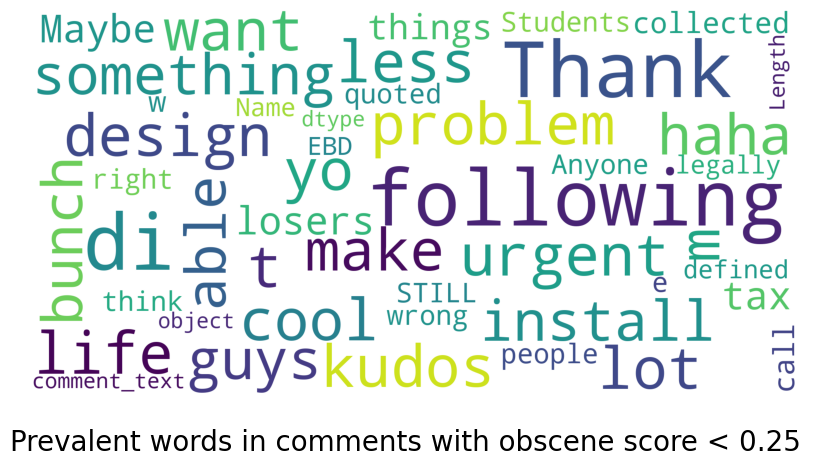

In [ ]:
show_wordcloud(train_df.loc[train_df['obscene']< 0.25]['comment_text'],
               title = 'Prevalent words in comments with obscene score < 0.25')

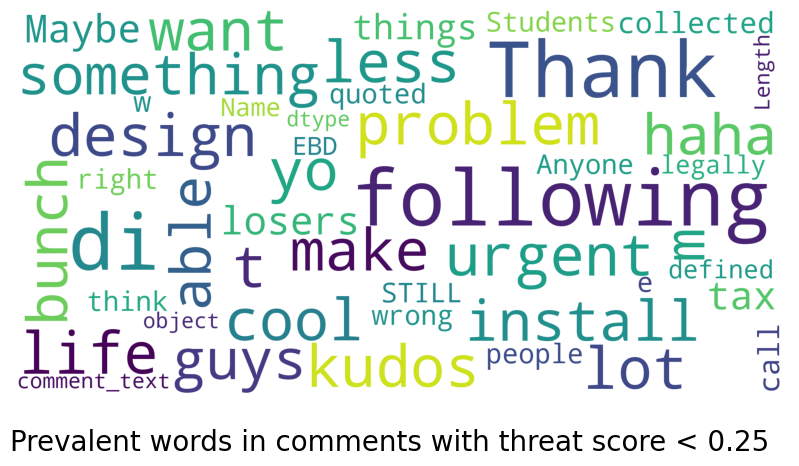

In [ ]:
show_wordcloud(train_df.loc[train_df['threat'] < 0.25]['comment_text'],
               title = 'Prevalent words in comments with threat score < 0.25')

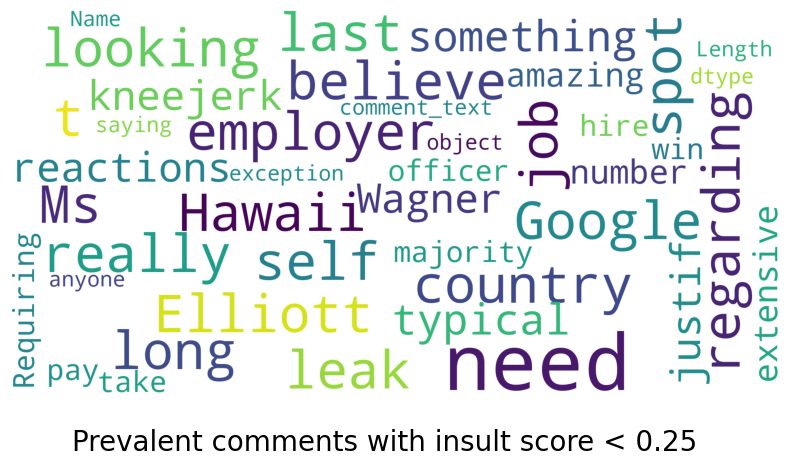

In [ ]:
show_wordcloud(train_df.loc[train_df['insult'] < 0.25]['comment_text'].sample(20000),
               title = 'Prevalent comments with insult score < 0.25')

In [ ]:
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))
def preprocess(text_string):
    if isinstance(text_string, str):
        text_string = text_string.lower() # Convert everything to lower case.
        text_string = re.sub('[^A-Za-z0-9]+', ' ', text_string) # Remove special characters and punctuations

        x = text_string.split()
        new_text = []

        for word in x:
            if word not in stop_words:
                new_text.append(stemmer.stem(word))

        text_string = ' '.join(new_text)
    return text_string

In [ ]:
%%time
train_df['preprocessed_text'] = train_df['comment_text'].apply(preprocess)

In [ ]:
train_df.head()

In [ ]:
%%time
test_df['preprocessed_text'] = test_df['comment_text'].apply(preprocess)

In [ ]:
feature = train_df[['preprocessed_text']]
output = train_df[['target']]
X_train, X_cv, y_train, y_cv = train_test_split(feature, output)

print(X_train.shape)
print(X_cv.shape)
print(y_train.shape)
print(y_cv.shape)

In [ ]:
X_train.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/'
import zipfile

 1699556619213.jpg
 1699556619225.jpg
'1 Million Subscribers Gift - BMBULLS'
 22CH10084_Assign_1_TC.pdf
 22CH10084_practice_sheet_TC.pdf
 aagaz
'American Expres Campus Challenge 2024'
'AMEX features doc.gdoc'
 assign5_22CH10084.pdf
'batsman level.gsheet'
'CDC Intern 2023'
'Colab Notebooks'
 Cold_mailing_phand.gsheet
'Copy of AHCM-HealthSocialNeedsScreeningTool-rev-8_10_2021.pdf'
'Copy of Gmail Sheets mail merge  (10).gsheet'
'Copy of Gmail Sheets mail merge  (11).gsheet'
'Copy of Gmail Sheets mail merge  (12).gsheet'
'Copy of Gmail Sheets mail merge  (13).gsheet'
'Copy of Gmail Sheets mail merge  (14).gsheet'
'Copy of Gmail Sheets mail merge  (15).gsheet'
'Copy of Gmail Sheets mail merge  (16).gsheet'
'Copy of Gmail Sheets mail merge  (17).gsheet'
'Copy of Gmail Sheets mail merge  (18).gsheet'
'Copy of Gmail Sheets mail merge  (19).gsheet'
'Copy of Gmail Sheets mail merge  (1).gsheet'
'Copy of Gmail Sheets mail merge  (20).gsheet'
'Copy of Gmail Sheets mail merge  (21).gsheet'
'Copy of

In [ ]:
# Path to the zipped folders
zip_file = '/content/drive/My Drive/data_comments.zip'
# Extract folder
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('/content/folder')


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
X_train = pd.read_pickle('/content/folder/data_comments/X_train.pkl')
X_cv = pd.read_pickle('/content/folder/data_comments/X_cv.pkl')
y_train = pd.read_pickle('/content/folder/data_comments/y_train.pkl')
y_cv = pd.read_pickle('/content/folder/data_comments/y_cv.pkl')

In [ ]:
# Hyperparameter tuning for various models
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDRegressor, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid
models = {
    'SGDRegressor': {
        'model': SGDRegressor(),
        'params': {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
    },
    'ElasticNet': {
        'model': ElasticNet(),
        'params': {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]}
    }
}


In [ ]:
best_model = None
best_error = float('inf')
best_model_name = ''
best_params = None

# Hyperparameter tuning
def train_and_evaluate(models, X_train, y_train, X_cv, y_cv):
    global best_model, best_error, best_model_name, best_params
    for model_name, model_info in models.items():
        print(f"Training {model_name}...")
        tr_errors = []
        cv_errors = []
        xticks = []

        for param_comb in ParameterGrid(model_info['params']):
            model = model_info['model'].set_params(**param_comb)
            model.fit(X_train, y_train)  # Train

            preds_train = model.predict(X_train)  # Get predictions on train set
            err_train = mean_squared_error(y_train, preds_train)  # Calculate error on train set
            tr_errors.append(err_train)

            preds_cv = model.predict(X_cv)  # Get predictions on CV set
            err_cv = mean_squared_error(y_cv, preds_cv)  # Calculate error on CV set
            cv_errors.append(err_cv)

            xticks.append(str(param_comb))
            print(f"Params: {param_comb}, Train MSE: {err_train}, CV MSE: {err_cv}")

            if err_cv < best_error:  # Update best model if current model is better
                best_error = err_cv
                best_model = model
                best_model_name = model_name
                best_params = param_comb

        plt.figure(figsize=(15,5))
        plt.suptitle(f"Hyperparameters vs MSE for {model_name}")
        plt.plot(range(len(xticks)), tr_errors, label='train')
        plt.plot(range(len(xticks)), cv_errors, label='cv')
        plt.legend()
        plt.xticks(range(len(xticks)), xticks, rotation=45)
        plt.xlabel('Hyperparameters')
        plt.ylabel('Mean Squared Error')
        plt.show()

In [ ]:
X_train['preprocessed_text'] = X_train['preprocessed_text'].astype(str).fillna('')
X_cv['preprocessed_text'] = X_cv['preprocessed_text'].astype(str).fillna('')
cnt_vec = CountVectorizer(ngram_range=(1,2), max_features=30000)
bow_train = cnt_vec.fit_transform(X_train['preprocessed_text'])
bow_cv = cnt_vec.transform(X_cv['preprocessed_text'])



NameError: name 'models' is not defined

Training SGDRegressor...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 1e-05, 'penalty': 'l1'}, Train MSE: 0.024193235364959525, CV MSE: 0.02305250864972723


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 1e-05, 'penalty': 'l2'}, Train MSE: 0.37862365948171645, CV MSE: 0.03688515530025294


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 0.0001, 'penalty': 'l1'}, Train MSE: 0.02445370656416952, CV MSE: 0.02459474762197245


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 0.0001, 'penalty': 'l2'}, Train MSE: 0.4669774317933142, CV MSE: 0.034663240663879116


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 0.001, 'penalty': 'l1'}, Train MSE: 0.03141258215136842, CV MSE: 0.03149287533187949


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 0.001, 'penalty': 'l2'}, Train MSE: 0.03605087526914101, CV MSE: 0.023939095734137585


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 0.01, 'penalty': 'l1'}, Train MSE: 0.03884398488375868, CV MSE: 0.038823365853943574


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 0.01, 'penalty': 'l2'}, Train MSE: 0.027887999008263293, CV MSE: 0.028031103099661264


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 0.1, 'penalty': 'l1'}, Train MSE: 0.03884398428536386, CV MSE: 0.03882336480249928


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 0.1, 'penalty': 'l2'}, Train MSE: 0.034876994064826645, CV MSE: 0.03490495111765995


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 1, 'penalty': 'l1'}, Train MSE: 0.0388439844445707, CV MSE: 0.03882336082307614


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 1, 'penalty': 'l2'}, Train MSE: 0.038041955237727736, CV MSE: 0.0380273648047227


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 10, 'penalty': 'l1'}, Train MSE: 0.03884399083326786, CV MSE: 0.038823374458427914


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 10, 'penalty': 'l2'}, Train MSE: 0.038721991271444135, CV MSE: 0.03870295132115977


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 100, 'penalty': 'l1'}, Train MSE: 0.038843983101918805, CV MSE: 0.03882336147438349


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 100, 'penalty': 'l2'}, Train MSE: 0.03884004152482874, CV MSE: 0.03881928422215174


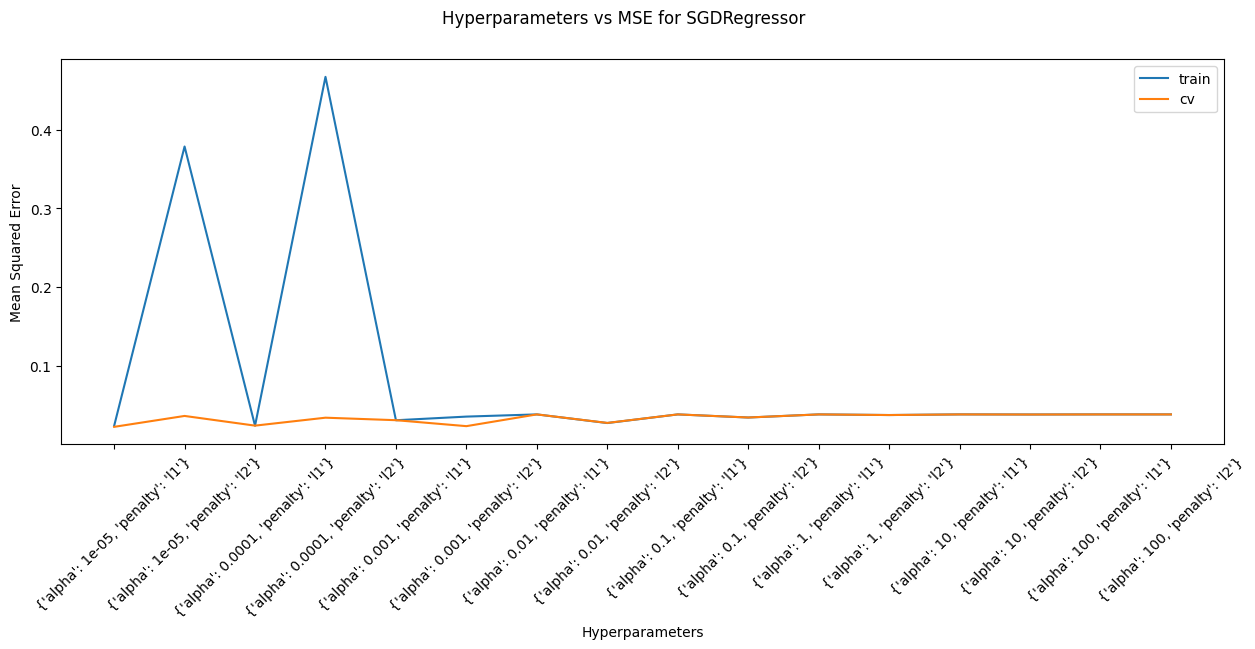

Training ElasticNet...
Params: {'alpha': 0.01, 'l1_ratio': 0.1}, Train MSE: 0.03337059965081015, CV MSE: 0.03344913787704814
Params: {'alpha': 0.01, 'l1_ratio': 0.5}, Train MSE: 0.037678921940442575, CV MSE: 0.03771259990900219
Params: {'alpha': 0.01, 'l1_ratio': 0.9}, Train MSE: 0.03884398309608923, CV MSE: 0.03882336160888321
Params: {'alpha': 0.1, 'l1_ratio': 0.1}, Train MSE: 0.03884398309608923, CV MSE: 0.03882336160888321
Params: {'alpha': 0.1, 'l1_ratio': 0.5}, Train MSE: 0.03884398309608923, CV MSE: 0.03882336160888321
Params: {'alpha': 0.1, 'l1_ratio': 0.9}, Train MSE: 0.03884398309608923, CV MSE: 0.03882336160888321
Params: {'alpha': 1, 'l1_ratio': 0.1}, Train MSE: 0.03884398309608923, CV MSE: 0.03882336160888321
Params: {'alpha': 1, 'l1_ratio': 0.5}, Train MSE: 0.03884398309608923, CV MSE: 0.03882336160888321
Params: {'alpha': 1, 'l1_ratio': 0.9}, Train MSE: 0.03884398309608923, CV MSE: 0.03882336160888321
Params: {'alpha': 10, 'l1_ratio': 0.1}, Train MSE: 0.03884398309608923

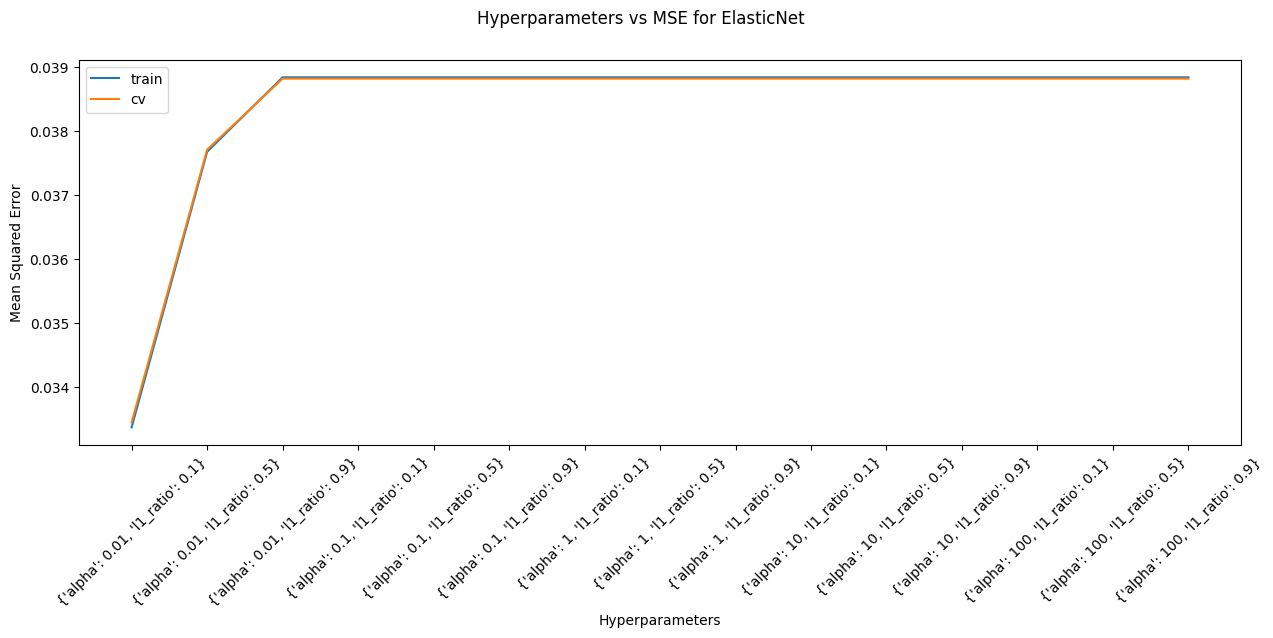

Training RandomForestRegressor...


<ipython-input-8-b80a364cf626>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)  # Train


In [ ]:
train_and_evaluate(models, bow_train, y_train, bow_cv, y_cv)

Training SGDRegressor...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 1e-05, 'penalty': 'l1'}, Train MSE: 0.025251868736891177, CV MSE: 0.025315943223023978


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 1e-05, 'penalty': 'l2'}, Train MSE: 0.023887903753643074, CV MSE: 0.024003796956447544


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 0.0001, 'penalty': 'l1'}, Train MSE: 0.029711945939188415, CV MSE: 0.029769062297071772


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 0.0001, 'penalty': 'l2'}, Train MSE: 0.025005699678308405, CV MSE: 0.025104135895803223


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 0.001, 'penalty': 'l1'}, Train MSE: 0.03827381472324711, CV MSE: 0.038278904423052006


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 0.001, 'penalty': 'l2'}, Train MSE: 0.030052962055620743, CV MSE: 0.030094476844473205


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 0.01, 'penalty': 'l1'}, Train MSE: 0.03884398750416685, CV MSE: 0.03882336215813432


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 0.01, 'penalty': 'l2'}, Train MSE: 0.03715206564190536, CV MSE: 0.037139617595960774


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 0.1, 'penalty': 'l1'}, Train MSE: 0.038843989491623196, CV MSE: 0.03882337265244844


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 0.1, 'penalty': 'l2'}, Train MSE: 0.038651227969479174, CV MSE: 0.03863151024072619


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 1, 'penalty': 'l1'}, Train MSE: 0.038843991919703585, CV MSE: 0.03882336497298468


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 1, 'penalty': 'l2'}, Train MSE: 0.038823889777690024, CV MSE: 0.03880341208002681


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 10, 'penalty': 'l1'}, Train MSE: 0.038843995762365933, CV MSE: 0.03882336773399462


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 10, 'penalty': 'l2'}, Train MSE: 0.03884210686583744, CV MSE: 0.03882148902695802


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 100, 'penalty': 'l1'}, Train MSE: 0.03884398369873962, CV MSE: 0.03882336363833439


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Params: {'alpha': 100, 'penalty': 'l2'}, Train MSE: 0.03884376562060396, CV MSE: 0.038823137302816176


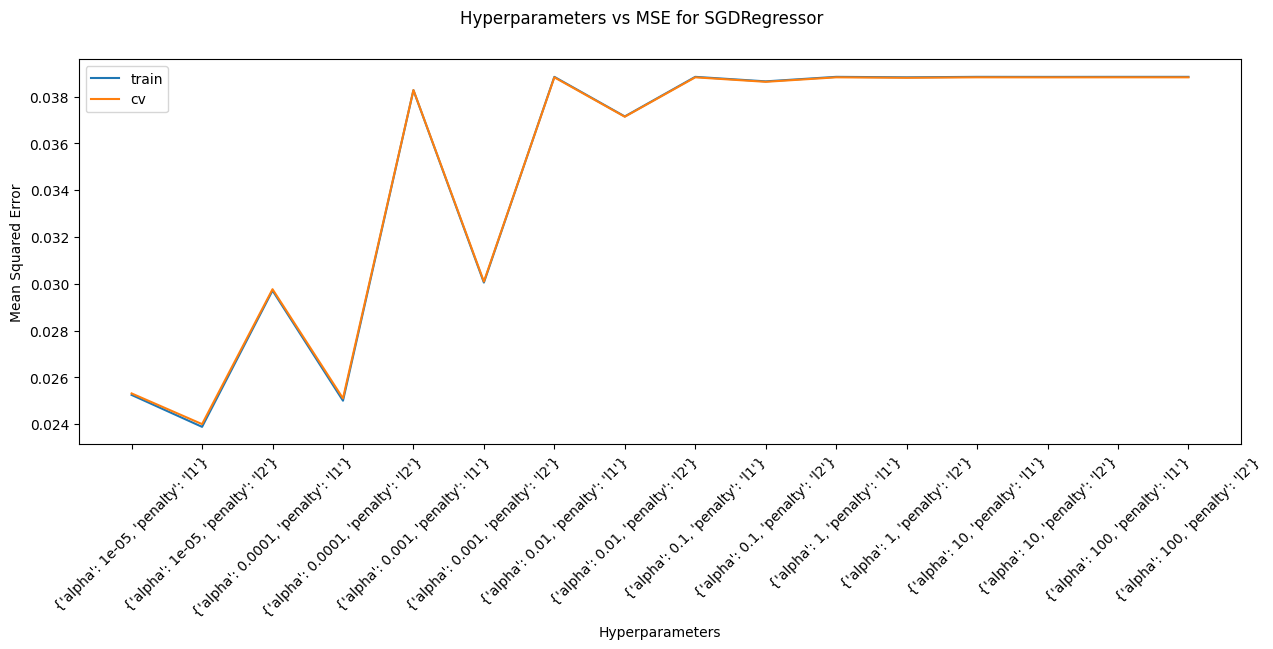

Training ElasticNet...
Params: {'alpha': 0.01, 'l1_ratio': 0.1}, Train MSE: 0.038795503564531986, CV MSE: 0.03877702946516936
Params: {'alpha': 0.01, 'l1_ratio': 0.5}, Train MSE: 0.03884398309608923, CV MSE: 0.03882336160888321
Params: {'alpha': 0.01, 'l1_ratio': 0.9}, Train MSE: 0.03884398309608923, CV MSE: 0.03882336160888321
Params: {'alpha': 0.1, 'l1_ratio': 0.1}, Train MSE: 0.03884398309608923, CV MSE: 0.03882336160888321
Params: {'alpha': 0.1, 'l1_ratio': 0.5}, Train MSE: 0.03884398309608923, CV MSE: 0.03882336160888321
Params: {'alpha': 0.1, 'l1_ratio': 0.9}, Train MSE: 0.03884398309608923, CV MSE: 0.03882336160888321
Params: {'alpha': 1, 'l1_ratio': 0.1}, Train MSE: 0.03884398309608923, CV MSE: 0.03882336160888321
Params: {'alpha': 1, 'l1_ratio': 0.5}, Train MSE: 0.03884398309608923, CV MSE: 0.03882336160888321
Params: {'alpha': 1, 'l1_ratio': 0.9}, Train MSE: 0.03884398309608923, CV MSE: 0.03882336160888321
Params: {'alpha': 10, 'l1_ratio': 0.1}, Train MSE: 0.03884398309608923

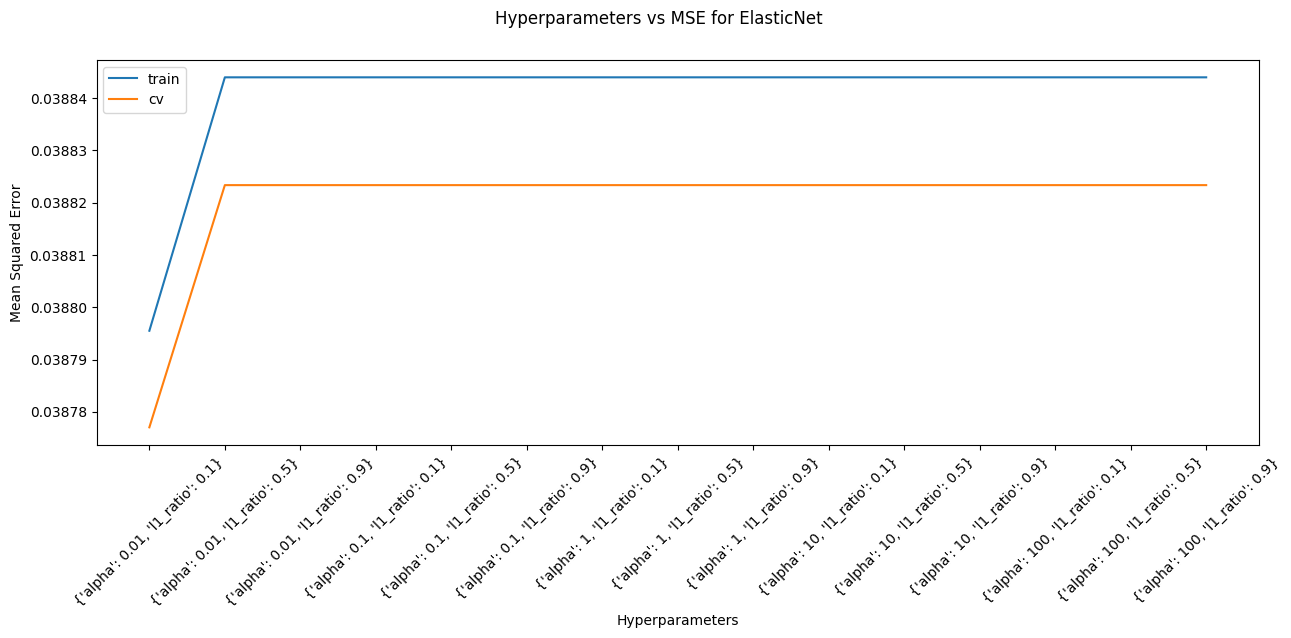

Training RandomForestRegressor...


<ipython-input-8-b80a364cf626>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)  # Train


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the 'preprocessed_text' column to strings and fill NaNs with an empty string
X_train['preprocessed_text'] = X_train['preprocessed_text'].astype(str).fillna('')
X_cv['preprocessed_text'] = X_cv['preprocessed_text'].astype(str).fillna('')

# Train and evaluate TF-IDF models
tfidf_vec = TfidfVectorizer(ngram_range=(1, 2), max_features=30000)
tfidf_train = tfidf_vec.fit_transform(X_train['preprocessed_text'])
tfidf_cv = tfidf_vec.transform(X_cv['preprocessed_text'])

# Now proceed with training and evaluation
train_and_evaluate(models, tfidf_train, y_train, tfidf_cv, y_cv)
